In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("drug200.csv")
df.head(-1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
194,46,F,HIGH,HIGH,34.686,DrugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX


In [3]:
df.shape

(200, 6)

In [4]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.isnull().mean()

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

<AxesSubplot:>

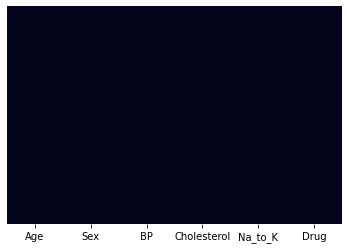

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
for col in df.columns:
    print(col,':',len(df[col].unique()))

Age : 57
Sex : 2
BP : 3
Cholesterol : 2
Na_to_K : 198
Drug : 5


In [10]:
unique_df= [] 
for x in df.columns.tolist():
    num= df[x].nunique()
    value= df[x].unique()
    unique_df.append(pd.Series({'col_name' : x,
               'num_unique' : num,
               'value_unique': value}))
uniques = pd.concat(unique_df,axis=1).T.set_index('col_name')
uniques

,num_unique,value_unique
col_name,,
Age,57,"[23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 5..."
Sex,2,"[F, M]"
BP,3,"[HIGH, LOW, NORMAL]"
Cholesterol,2,"[HIGH, NORMAL]"
Na_to_K,198,"[25.355, 13.093, 10.113999999999999, 7.7979999..."
Drug,5,"[DrugY, drugC, drugX, drugA, drugB]"


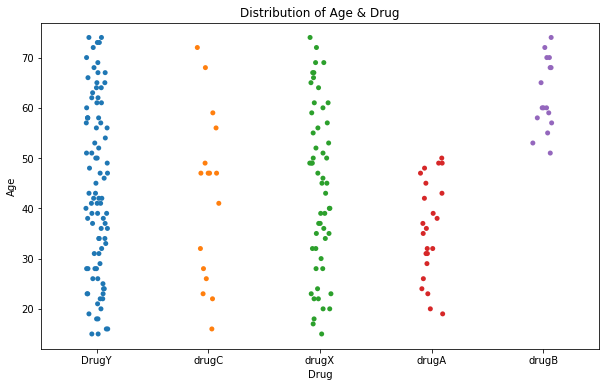

In [11]:
# Visualize age and drug type using strip plot
plt.figure(figsize = (10 , 6))
# Plotting a swarmplot to get a distribution of categorical and numerical variables
sns.stripplot(x = 'Drug' , y = 'Age' , data =df)
plt.title('Distribution of Age & Drug')
plt.show()

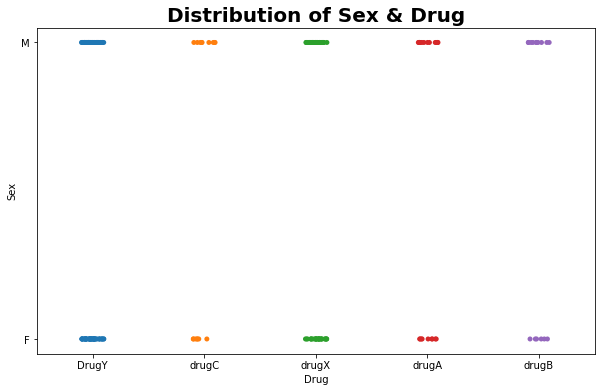

In [74]:
plt.figure(figsize = (10 , 6))
# Plotting a swarmplot to get a distribution of categorical and numerical variables
sns.stripplot(x = 'Drug' , y = 'Sex' , data =df)
plt.title('Distribution of Sex & Drug',fontsize=20, fontweight='bold')
plt.show()

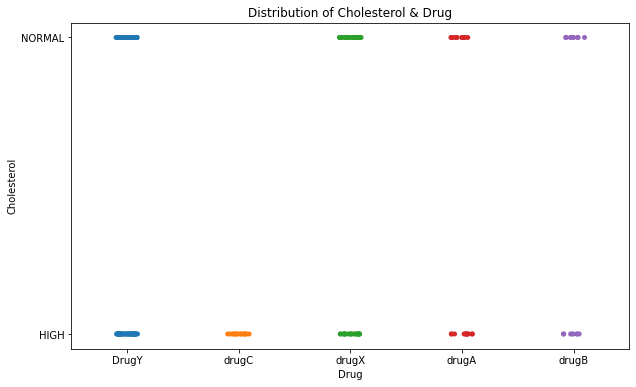

In [13]:
plt.figure(figsize = (10 , 6))
# Plotting a swarmplot to get a distribution of categorical and numerical variables
sns.stripplot(x = 'Drug' , y = 'Cholesterol' , data =df)
plt.title('Distribution of Cholesterol & Drug')
plt.show()

<Figure size 1440x720 with 0 Axes>

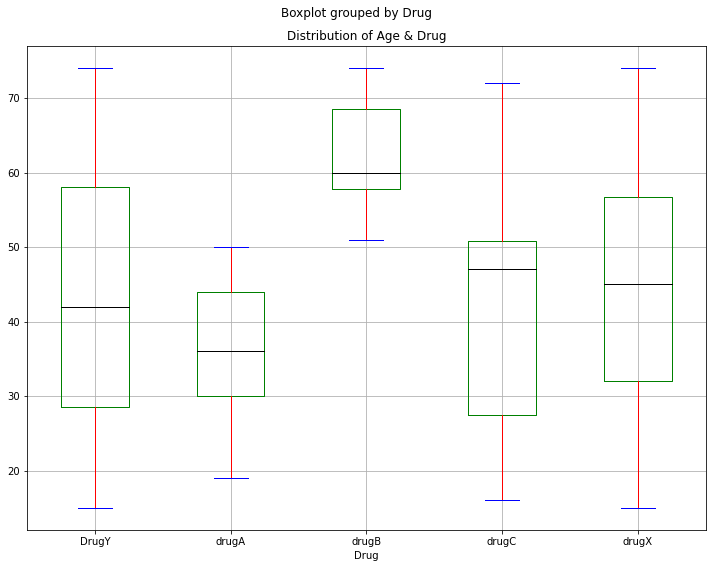

In [14]:
# Visualize age and drug type using Box plot
plt.figure(figsize = (20 , 10))
props = dict(boxes = "green", whiskers="red", medians= "black", caps ="blue")
df.boxplot(by = 'Drug' , column = ['Age'] , figsize = (10 , 8) , color = props)
plt.title('Distribution of Age & Drug')
plt.tight_layout()
plt.show()

In [16]:
print(df.groupby(["Drug"]).size())

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64


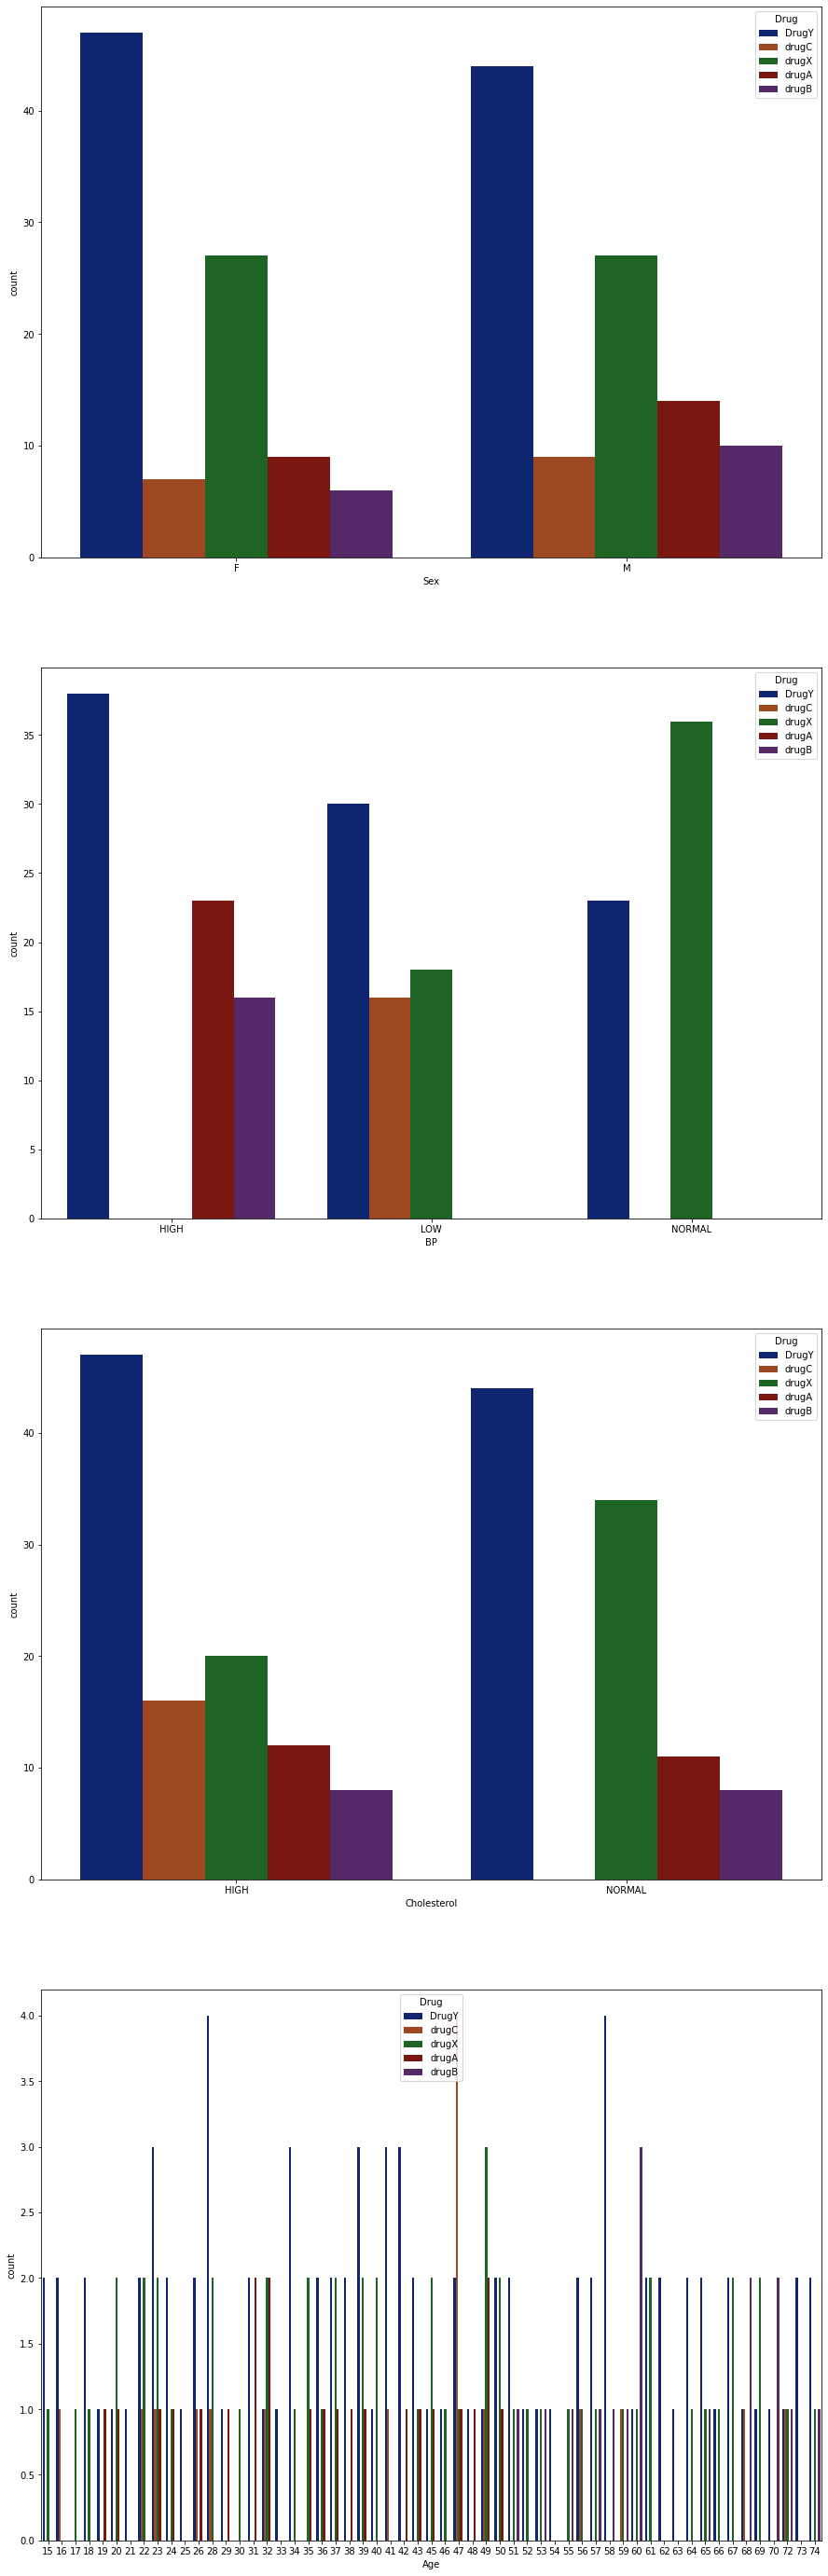

In [17]:
figs, axes = plt.subplots(4, 1, figsize=(15,50))
for i in range(0, 4):
    ax = sns.countplot(data=df, x=df.iloc[:,i], hue='Drug', ax=axes[i-1], palette='dark')

In [34]:
x=pd.get_dummies(df,drop_first=True)
x.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,0,0,0,0,0,0,0,0
1,47,13.093,1,1,0,0,0,0,1,0
2,47,10.114,1,1,0,0,0,0,1,0
3,28,7.798,0,0,1,0,0,0,0,1
4,61,18.043,0,1,0,0,0,0,0,0


In [37]:
x.shape

(200, 10)

In [38]:
y = df['Drug']
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [39]:
y.shape

(200,)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [65]:
print("shape of x_train:",x.shape)
print("shape of x_test:",x.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (200, 10)
shape of x_test: (200, 10)
shape of y_train: (150,)
shape of y_test: (50,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)


0.82

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        22
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.91      0.95        11

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.99        50
weighted avg       0.98      0.98      0.98        50



In [68]:
accuracy_score(y_test,y_pred)


0.98

In [88]:
from sklearn.model_selection import cross_val_score
clf1 = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(clf1, scaled_X_train, y_train, cv=5)
clf1.fit(scaled_X_train, y_train)

print("Train Score:", np.mean(accuracies))
print("Test Score:", clf1.score(scaled_X_test, y_test))

Train Score: 0.9866666666666667
Test Score: 0.98
